In [1]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


In [2]:
consommation_chauffage = extract_and_concat_consommation(Simulation_Dataset, column_index=4, prefix="consommation_heat_")


In [3]:

# Exemple d'utilisation
city_groups = {
    "Weather_Dataset": Weather_Dataset
   
    
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "Wind_": 4,
    "Solar_": 5,
    "Ground_": 10
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)

city_groups = {
    "Simulation_Dataset":Simulation_Dataset  
}

prefix_column_map = {
    "Tint_": 2,   
}

combined_Tint = extract_and_combine_all(city_groups, prefix_column_map)


In [4]:
Text_combined = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined = combined_data.get('Hum_combined_Weather_Dataset')
Wind_combined = combined_data.get('Wind_combined_Weather_Dataset')
Tint_combined = combined_Tint.get('Tint_combined_Simulation_Dataset')


In [5]:
start_date = "2018-01-01"
dates = pd.date_range(start=start_date, periods=len(consommation_chauffage), freq="D") 
consommation_chauffage.insert(0, "Date", dates)
Text_combined.insert(0, "Date", dates)
Hum_combined.insert(0, "Date", dates)

In [6]:
def add_heating_season(df, date_column='Date'):
    """
    Ajoute une colonne 'heat_on' qui vaut 1 si la date est entre le 1er novembre et le 30 avril, sinon 0.

    """ 
    # Extraire le mois et le jour
    month_day = df[date_column].dt.month * 100 + df[date_column].dt.day
    
    # Appliquer la condition: 1 si entre 1101 (1er nov) et 0430 (30 avril), sinon 0
    df['heat_on'] = ((month_day >= 1101) | (month_day <= 430)).astype(int)
    
    return df



In [7]:

add_heating_season(consommation_chauffage)
add_heating_season(Text_combined)
add_heating_season(Hum_combined)

,Date,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,heat_on
0,2018-01-01,82.0,81.0,80.5,83.0,84.5,84.0,85.0,85.0,81.0,...,58.0,72.0,79.0,83.5,83.0,84.0,86.0,86.5,86.5,1
1,2018-01-02,87.0,88.0,88.5,89.0,89.0,89.5,89.5,89.5,90.0,...,86.0,86.5,88.0,89.5,89.5,89.5,90.5,91.0,91.0,1
2,2018-01-03,91.0,90.0,88.0,84.5,80.5,78.0,76.0,76.0,78.0,...,69.5,69.0,71.0,73.5,75.0,75.5,75.5,80.0,85.0,1
3,2018-01-04,85.0,84.5,84.5,85.0,84.5,83.5,82.5,81.5,80.5,...,61.0,60.5,63.0,69.5,74.5,74.5,70.5,73.0,77.5,1
4,2018-01-05,76.5,76.0,77.0,79.5,81.5,83.0,84.5,84.5,84.5,...,55.5,60.0,68.0,75.0,79.0,82.5,86.5,91.0,94.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2024-12-25,98.0,98.5,99.5,100.0,100.0,100.0,99.5,99.5,100.0,...,72.5,70.5,73.0,78.0,82.5,87.5,92.0,94.5,96.5,1
2551,2024-12-26,98.5,99.0,99.0,99.5,100.0,100.0,99.5,99.0,99.0,...,58.0,58.5,65.0,74.5,81.0,83.0,84.5,86.0,89.0,1
2552,2024-12-27,90.5,90.5,91.5,92.0,92.0,92.5,93.5,94.5,94.5,...,55.5,54.0,59.0,72.5,83.0,86.5,88.5,92.0,95.0,1
2553,2024-12-28,97.0,98.0,98.0,98.5,99.0,99.0,99.5,100.0,100.0,...,89.5,87.0,86.5,90.0,93.0,93.5,94.5,95.5,96.5,1


In [8]:
df_conso = consommation_chauffage[consommation_chauffage["heat_on"] == 1].copy()
df_Text = Text_combined[Text_combined["heat_on"] == 1].copy()
df_Hum = Hum_combined[Hum_combined["heat_on"] == 1].copy()



In [9]:
clustering_heat_toulouse = clustering(
    df=df_conso.drop(columns=["Date"]),  
    n_parts=1,                          
    status_column="heat_on",           
    n_clusters_list=[3]                
)



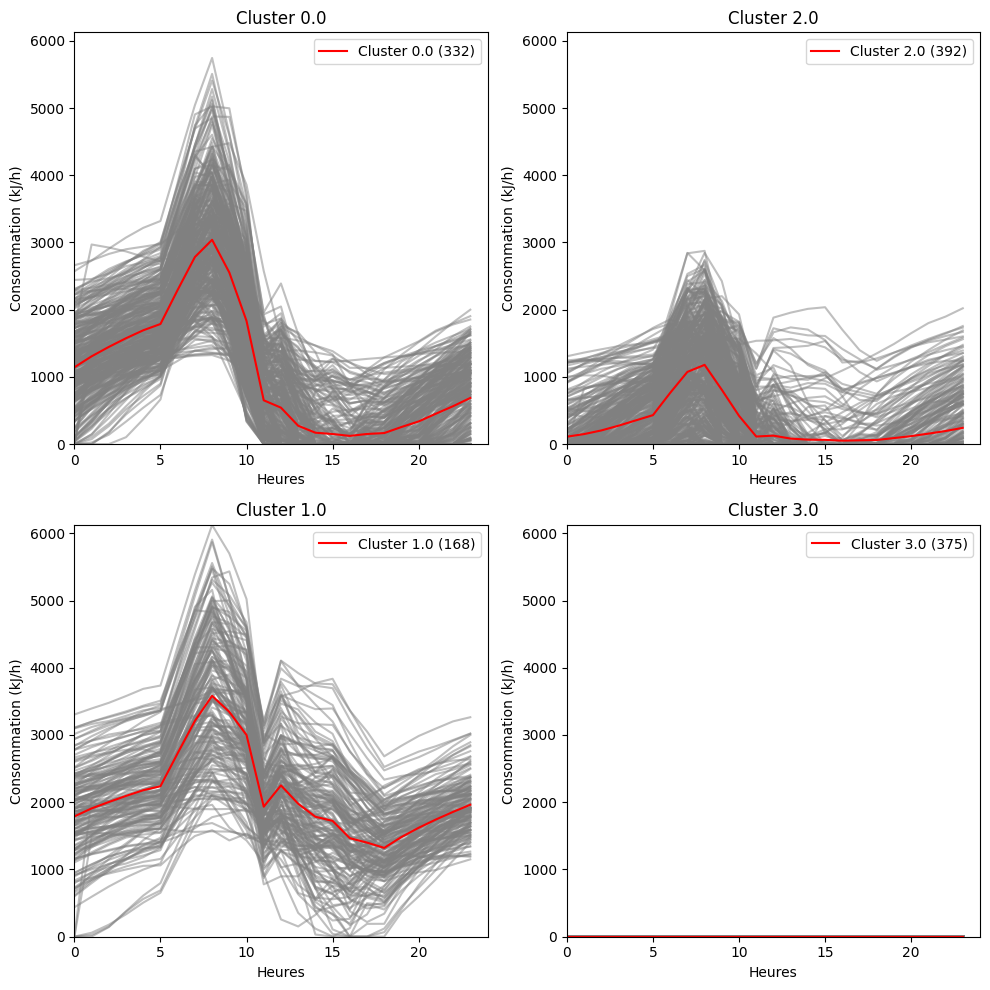

In [10]:
plot_clusters(clustering_heat_toulouse.drop(columns=["heat_on"]))

In [193]:
Text_conso_heat_tou=pd.concat([df_Text,clustering_heat_toulouse["clusters_1"]],axis=1)

In [194]:
Text_combined['clusters'] = 4

# Assigner les valeurs de clustering_heat_toulouse uniquement pour les indices correspondants
valid_indices = Text_combined.index.intersection(clustering_heat_toulouse.index)
Text_combined.loc[valid_indices, 'clusters'] = clustering_heat_toulouse.loc[valid_indices, 'clusters_1'].values

In [200]:
Text_conso_heat_tou.loc[Text_conso_heat_tou['clusters_1'] == 3, 'heat_on'] = 0


In [201]:
Text_conso_heat_tou['heat_on'].unique()

array([1, 0])


Évaluation de Random Forest...


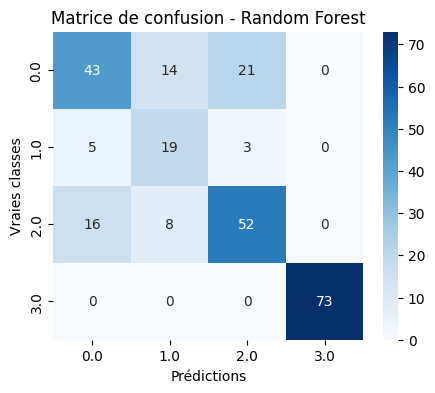

Random Forest - F1: 0.7375 - Accuracy: 0.7362 - Temps: 0.80s
###################################################################

Évaluation de Logistic Regression...


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



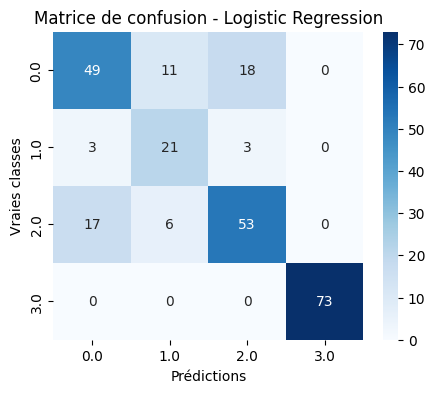

Logistic Regression - F1: 0.7723 - Accuracy: 0.7717 - Temps: 0.64s
###################################################################

Évaluation de SVC...


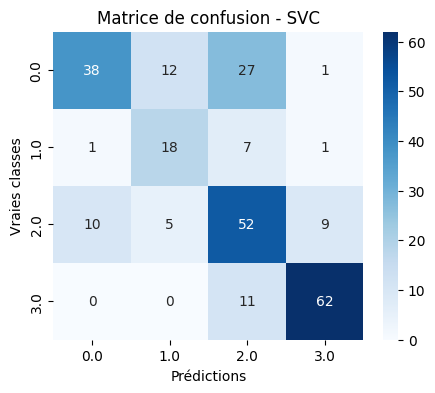

SVC - F1: 0.6695 - Accuracy: 0.6693 - Temps: 0.11s
###################################################################

Évaluation de KNN...


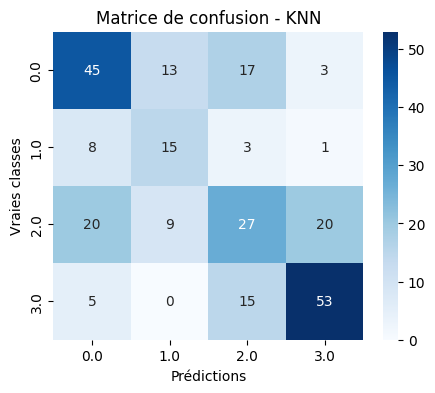

KNN - F1: 0.5472 - Accuracy: 0.5512 - Temps: 0.03s
###################################################################

Évaluation de Gradient Boosting...


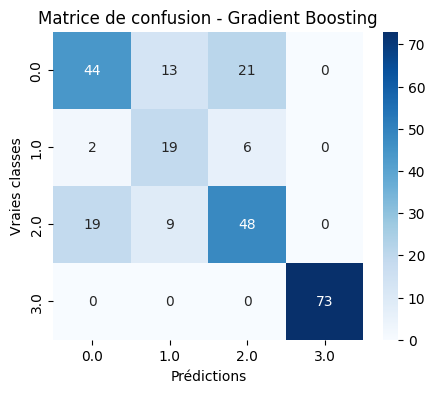

Gradient Boosting - F1: 0.7260 - Accuracy: 0.7244 - Temps: 4.84s
###################################################################


In [202]:

Text_conso_heat_tou.columns = Text_conso_heat_tou.columns.astype(str)
re, Test_Text_heat_toulouse = evaluate_models_split(
    df=Text_conso_heat_tou.drop(columns=["Date"]),
    target_cols="clusters_1",
    models=models,
    split_ratio=8
)

In [204]:
Text_conso_heat_tou=pd.concat([df_Text,clustering_heat_toulouse.drop(columns=["heat_on"])],axis=1)

In [206]:
Text_combined['clusters'] = 4

# Assigner les valeurs de clustering_heat_toulouse uniquement pour les indices correspondants
valid_indices = Text_combined.index.intersection(clustering_heat_toulouse.index)
Text_combined.loc[valid_indices, 'clusters'] = clustering_heat_toulouse.loc[valid_indices, 'clusters_1'].values

In [207]:
# On récupère uniquement les indices communs aux deux DataFrames
common_indices = Test_Text_heat_toulouse.index.intersection(Text_conso_heat_tou.index)

# On assigne uniquement sur ces indices communs
Text_conso_heat_tou.loc[common_indices, "clusters_1"] = Test_Text_heat_toulouse.loc[common_indices, "y_pred_Logistic Regression_clusters_1"]


In [208]:
Text_conso_j_1=pd.concat([Text_combined,consommation_chauffage.drop(columns=["Date","heat_on"])],axis=1)


In [209]:

Text_conso_heat_tou = Text_conso_heat_tou.sort_values('Date')
Text_conso_j_1 = Text_conso_j_1.sort_values('Date')

# Créer une liste pour stocker les lignes combinées
combined_rows = []

# Parcourir chaque ligne de Text_conso_heat_tou
for index, row in Text_conso_heat_tou.iterrows():
    jour_precedent = row['Date'] - pd.Timedelta(days=1)  # Trouver jour j-1
    
    # Vérifier si j-1 existe dans Text_combined
    prev_row = Text_conso_j_1[Text_conso_j_1['Date'] == jour_precedent]
    
    if not prev_row.empty:
        prev_row = prev_row.iloc[0]  # Sélectionner uniquement la première correspondance
        
        # Ajouter un suffixe "_j-1" aux colonnes du jour précédent
        #prev_row = prev_row.rename(lambda x: f"{x}_j-1")

        # Fusionner proprement les deux lignes
        combined_row = pd.concat([prev_row.to_frame().T.reset_index(drop=True), 
                                  row.to_frame().T.reset_index(drop=True)], axis=1)
        
        combined_rows.append(combined_row)  # Ajouter la ligne fusionnée
    else:
        # Si aucune correspondance, passer à la ligne suivante sans l'ajouter
        continue

# Convertir la liste en DataFrame final
Text_final = pd.concat(combined_rows, ignore_index=True)

Text_final2 = Text_final.drop(columns=[col for col in Text_final.columns if "Date" in str(col).lower()], errors='ignore')



In [210]:
# Ajouter un suffixe automatique pour rendre les noms de colonnes uniques
def make_unique_columns(columns):
    seen = {}
    unique_cols = []
    for col in columns:
        if col not in seen:
            seen[col] = 1
            unique_cols.append(col)
        else:
            seen[col] += 1
            unique_cols.append(f"{col}_{seen[col]}")
    return unique_cols

Text_final2.columns = make_unique_columns(Text_final2.columns)

cols = Text_final2.columns.tolist()

first_part = cols[:-25]              
twentyfour_last_cols = cols[-25:-1]  
two_before_last = cols[-1:]      
new_cols = first_part + two_before_last + twentyfour_last_cols

Text_final_reordered = Text_final2[new_cols]

In [211]:
Text_final_reordered.shape

(1266, 102)

In [212]:
Text_final_reordered.columns = Text_final_reordered.columns.astype(str)

Text_final_reordered = Text_final_reordered.drop(
    columns=[col for col in Text_final_reordered.columns if col.startswith("Dat")]
)


In [213]:
from sklearn.preprocessing import MinMaxScaler
y2= Text_final_reordered.iloc[:, -24:].values 
X2 = Text_final_reordered.iloc[:, :-24].values 

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X2 = scaler_X.fit_transform(X2)
y2 = scaler_y.fit_transform(y2)


split_index = int((X2.shape[0] * 8) / 10)
X2 = X2.reshape(X2.shape[0], 1, X2.shape[1])

X_train2 = X2[:split_index, :]
X_test2 = X2[split_index:, :]
y_train2 = y2[:split_index, :]
y_test2 = y2[split_index:, :]



# Vérification des dimensions
print("Shape de X_train2 :", X_train2.shape)
print("Shape de X_test2 :", X_test2.shape)
print("Shape de y_train2 :", y_train2.shape)
print("Shape de y_test2 :", y_test2.shape)

Shape de X_train2 : (1012, 1, 76)
Shape de X_test2 : (254, 1, 76)
Shape de y_train2 : (1012, 24)
Shape de y_test2 : (254, 24)


In [214]:

def train_and_evaluate(model, X_train, y_train, X_test, y_test, scaler_temp, scaler_cons):
    # Compilation du modèle avec optimizer, loss et métriques
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    # Callback early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Séparation d'un ensemble validation à partir des données d'entraînement (sans shuffle)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
    # Entraînement du modèle avec validation et early stopping
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    # Affichage de la courbe de loss durant l'entraînement
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss during training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
   
    # Évaluation du modèle sur l'ensemble validation
    loss, mae, mse = model.evaluate(X_val, y_val)
    rmse = np.sqrt(mse) 
    print(f"Validation Loss : {loss}")
    print(f"Validation MAE: {mae}")
    print(f"Validation MSE: {mse}")
    print(f"Validation RMSE: {rmse}")
    
    # Prédiction sur l'ensemble test
    predictions = model.predict(X_test) 
    y_test_reshape = y_test.reshape(-1, 24) 
    # Inverse transformation de la normalisation de la consommation
    predictions_norm = scaler_cons.inverse_transform(predictions)
    y_test_reshape_norm = scaler_cons.inverse_transform(y_test_reshape)

    # Calcul des métriques sur l'ensemble test
    mae_test = mean_absolute_error(y_test_reshape_norm, predictions_norm)
    mse_test = mean_squared_error(y_test_reshape_norm, predictions_norm)
    rmse_test = np.sqrt(mse_test)
    r2 = r2_score(y_test_reshape_norm, predictions_norm)
    cvrmse = rmse_test / np.mean(y_test_reshape_norm)

    print(f"Test MAE: {mae_test}")
    print(f"Test MSE: {mse_test}")
    print(f"Test RMSE: {rmse_test}")
    print(f"Test R²: {r2}")
    print(f"Test CVRMSE: {cvrmse}")

    return history, loss, mae, mse, rmse, mae_test, mse_test, rmse_test, r2, cvrmse, predictions



def model_lstm(X_train2, y_train2, X_test2, y_test2, scaler_temp, scaler_cons):
    # Définition du modèle LSTM séquentiel
    model2 = Sequential()
    # Couche LSTM avec 68 unités, activation tanh, forme d'entrée adaptée
    model2.add(LSTM(68, activation='tanh', input_shape=(X_train2.shape[1], X_train2.shape[2])))  
    # Couche Dropout pour régularisation
    model2.add(Dropout(0.2))
    # Couche Dense finale avec 24 sorties et activation linéaire (prédiction continue)
    model2.add(Dense(24, activation='linear'))   
    
    # Entraînement et évaluation du modèle
    history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = train_and_evaluate(
        model2, X_train2, y_train2, X_test2, y_test2, scaler_temp, scaler_cons
    )
    
    return model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2


Epoch 1/100


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0647 - mae: 0.1785 - mse: 0.0647 - val_loss: 0.0398 - val_mae: 0.1432 - val_mse: 0.0398
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mae: 0.1276 - mse: 0.0306 - val_loss: 0.0190 - val_mae: 0.0914 - val_mse: 0.0190
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mae: 0.0978 - mse: 0.0199 - val_loss: 0.0178 - val_mae: 0.0864 - val_mse: 0.0178
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mae: 0.0936 - mse: 0.0190 - val_loss: 0.0173 - val_mae: 0.0837 - val_mse: 0.0173
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mae: 0.0917 - mse: 0.0178 - val_loss: 0.0158 - val_mae: 0.0811 - val_mse: 0.0158
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0177 - mae: 0.0908 - mse: 0.0177 - val_loss: 0.0150 - val_mae: 0.0794 - val_mse: 0.0150
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mae: 0.0868 - mse: 0.0160 - val_loss: 0.0147 - v

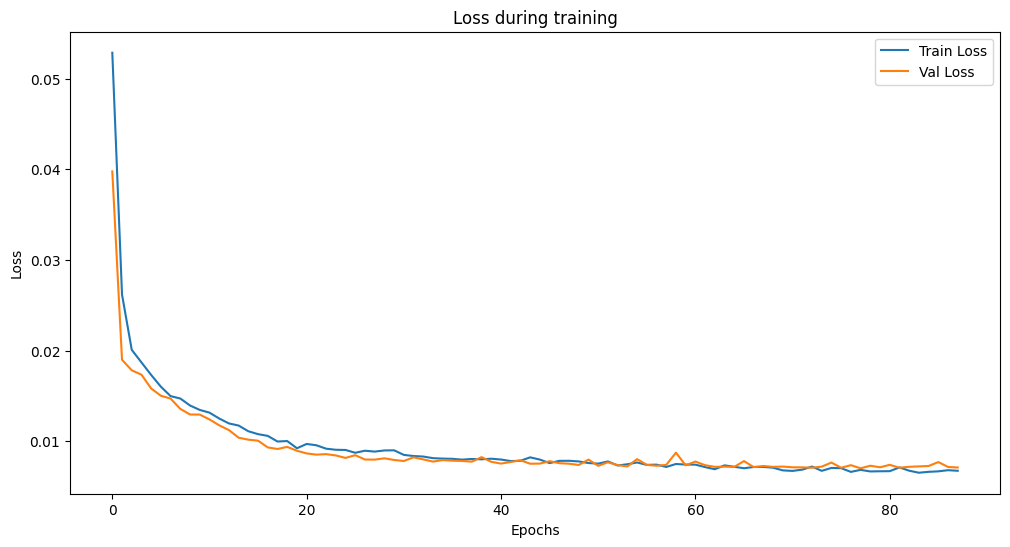

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0095 - mae: 0.0635 - mse: 0.0095
Validation Loss : 0.007010936737060547
Validation MAE: 0.052803605794906616
Validation MSE: 0.007010936737060547
Validation RMSE: 0.08373133664919334
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Test MAE: 232.08405265316162
Test MSE: 124606.3031547931
Test RMSE: 352.996180085271
Test R²: 0.7627067457540048
Test CVRMSE: 0.5684285563526891


In [215]:
model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_train2, 
    y_train2, 
    X_test2, 
    y_test2, 
    scaler_X, 
    scaler_y
)
  

In [245]:
import pandas as pd

Text_conso_heat_tou = Text_conso_heat_tou.sort_values('Date')
Text_conso_j_1 = Text_conso_j_1.sort_values('Date')

combined_rows = []

for index, row in Text_conso_heat_tou.iterrows():
    jour_precedent_1 = row['Date'] - pd.Timedelta(days=1)  # jour j-1
    jour_precedent_2 = row['Date'] - pd.Timedelta(days=2)  # jour j-2
    
    prev_row_1 = Text_conso_j_1[Text_conso_j_1['Date'] == jour_precedent_1]
    prev_row_2 = Text_conso_j_1[Text_conso_j_1['Date'] == jour_precedent_2]
    
    if not prev_row_1.empty and not prev_row_2.empty:
        prev_row_1 = prev_row_1.iloc[0].add_suffix('_j-1')
        prev_row_2 = prev_row_2.iloc[0].add_suffix('_j-2')
        
        # La ligne du jour actuel sans suffixe
        current_row = row
        
        # Concaténer les 3 lignes (jour j-2, jour j-1, jour j)
        combined_row = pd.concat([
            prev_row_2, 
            prev_row_1,
            current_row
        ]).to_frame().T.reset_index(drop=True)
        
        combined_rows.append(combined_row)
    else:
        continue  # passer si l'un des jours précédents est absent

Text_final = pd.concat(combined_rows, ignore_index=True)

# Optionnel : supprimer colonnes date
Text_final2 = Text_final.drop(
    columns=[col for col in Text_final.columns if isinstance(col, str) and "date" in col.lower()],
    errors='ignore'
)


In [249]:
# Ajouter un suffixe automatique pour rendre les noms de colonnes uniques
def make_unique_columns(columns):
    seen = {}
    unique_cols = []
    for col in columns:
        if col not in seen:
            seen[col] = 1
            unique_cols.append(col)
        else:
            seen[col] += 1
            unique_cols.append(f"{col}_{seen[col]}")
    return unique_cols

Text_final2.columns = make_unique_columns(Text_final2.columns)

cols = Text_final2.columns.tolist()

first_part = cols[:-25]              
twentyfour_last_cols = cols[-25:-1]  
two_before_last = cols[-1:]      
new_cols = first_part + two_before_last + twentyfour_last_cols

Text_final_reordered = Text_final2[new_cols]

In [251]:
Text_final_reordered.shape

(1265, 150)

In [252]:
X = np.stack([
    Text_final_reordered.iloc[:, :24].values,
    Text_final_reordered.iloc[:, 26:50].values,     
    Text_final_reordered.iloc[:, 50:74].values,
    Text_final_reordered.iloc[:, 76:100].values,
    Text_final_reordered.iloc[:, 100:124].values            
], axis=2)

print("Shape de X :", X.shape)

Shape de X : (1265, 24, 5)


In [88]:
pd.set_option('display.max_columns', None)

Text_final_reordered.head(1)

,0_j-2,1_j-2,2_j-2,3_j-2,4_j-2,5_j-2,6_j-2,7_j-2,8_j-2,9_j-2,10_j-2,11_j-2,12_j-2,13_j-2,14_j-2,15_j-2,16_j-2,17_j-2,18_j-2,19_j-2,20_j-2,21_j-2,22_j-2,23_j-2,heat_on_j-2,clusters_j-2,0_j-2_2,1_j-2_2,2_j-2_2,3_j-2_2,4_j-2_2,5_j-2_2,6_j-2_2,7_j-2_2,8_j-2_2,9_j-2_2,10_j-2_2,11_j-2_2,12_j-2_2,13_j-2_2,14_j-2_2,15_j-2_2,16_j-2_2,17_j-2_2,18_j-2_2,19_j-2_2,20_j-2_2,21_j-2_2,22_j-2_2,23_j-2_2,0_j-1,1_j-1,2_j-1,3_j-1,4_j-1,5_j-1,6_j-1,7_j-1,8_j-1,9_j-1,10_j-1,11_j-1,12_j-1,13_j-1,14_j-1,15_j-1,16_j-1,17_j-1,18_j-1,19_j-1,20_j-1,21_j-1,22_j-1,23_j-1,heat_on_j-1,clusters_j-1,0_j-1_2,1_j-1_2,2_j-1_2,3_j-1_2,4_j-1_2,5_j-1_2,6_j-1_2,7_j-1_2,8_j-1_2,9_j-1_2,10_j-1_2,11_j-1_2,12_j-1_2,13_j-1_2,14_j-1_2,15_j-1_2,16_j-1_2,17_j-1_2,18_j-1_2,19_j-1_2,20_j-1_2,21_j-1_2,22_j-1_2,23_j-1_2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,heat_on,clusters_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,9.06,8.93,8.5,8.14,7.985,7.81,7.8,7.81,7.95,8.76,10.415,12.35,13.595,14.29,14.29,12.995,11.43,10.35,9.955,10.115,10.08,9.875,9.74,9.695,1,0,0.0,1191.035222,1312.758731,1419.587492,1513.17473,1578.453365,1964.393414,2340.466249,2674.424141,1974.679566,764.431616,0.0,0.0,0.0,0.0,0.0,46.882802,0.0,12.597284,165.032178,309.615664,454.360768,581.485442,692.696269,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,1,0,810.107258,932.496397,1038.400298,1125.989678,1203.801168,1262.344356,1615.840151,1906.159536,2163.834353,2141.193211,2045.397519,1392.473496,1642.885784,1425.817471,1235.423295,1216.862847,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856,13.715,13.685,13.87,14.49,15.24,15.57,15.76,15.765,15.485,15.33,15.45,15.78,16.045,16.045,15.995,15.965,15.585,14.83,14.145,13.705,13.27,12.95,12.925,13.19,1,2.0,1003.897458,1022.89932,1018.746767,970.512303,901.581261,847.178108,864.854141,891.012656,970.925253,970.136841,727.212779,200.974158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.356592,200.292594,324.326513,405.764384,454.396293


In [253]:
X[0]

array([[9.06, 0.0, 9.5, 810.1072582387496, 13.715],
       [8.929999999999998, 1191.0352218384069, 9.2, 932.4963969348099,
        13.685],
       [8.5, 1312.7587309635564, 8.974999999999998, 1038.4002983638056,
        13.87],
       [8.14, 1419.5874918518457, 8.84, 1125.9896778158943, 14.49],
       [7.9849999999999985, 1513.1747298933917, 8.769999999999998,
        1203.8011678240146, 15.24],
       [7.81, 1578.4533647967182, 8.620000000000001, 1262.344355640278,
        15.57],
       [7.8, 1964.393413599108, 8.66, 1615.840150506956, 15.76],
       [7.81, 2340.4662491240088, 8.929999999999998, 1906.1595357490953,
        15.765],
       [7.95, 2674.4241410197283, 9.170000000000002, 2163.834352832608,
        15.485],
       [8.76, 1974.679566279352, 9.26, 2141.1932113074654, 15.33],
       [10.415, 764.4316159963491, 9.5, 2045.3975186558016, 15.45],
       [12.35, 0.0, 10.34, 1392.473495759099, 15.78],
       [13.595, 0.0, 11.485, 1642.8857837311662, 16.045],
       [14.29, 0.0, 12

In [254]:
y = Text_final_reordered.iloc[:, -24:].values

In [255]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# X shape: (n_samples, time_steps, n_features)
# Y shape: (n_samples, time_steps)

# On doit normaliser X feature par feature,
# donc on reshape X en 2D (pour scaler), puis on reshape après

n_samples, time_steps, n_features = X.shape

# Reshape X en 2D (n_samples*time_steps, n_features)
X_reshaped = X.reshape(-1, n_features)

scaler_X = MinMaxScaler()
X_scaled_reshaped = scaler_X.fit_transform(X_reshaped)

# Revenir à la forme 3D
X_scaled = X_scaled_reshaped.reshape(n_samples, time_steps, n_features)

# Pour Y (2D), on peut scaler directement
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(y)  # (n_samples, time_steps)

# Maintenant X_scaled et Y_scaled sont prêts pour entraîner le modèle


In [256]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y_scaled, test_size=0.2, random_state=42, shuffle=False
)

Epoch 1/100


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0598 - mae: 0.1727 - mse: 0.0598 - val_loss: 0.0282 - val_mae: 0.1196 - val_mse: 0.0282
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0302 - mae: 0.1279 - mse: 0.0302 - val_loss: 0.0227 - val_mae: 0.0952 - val_mse: 0.0227
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0232 - mae: 0.1039 - mse: 0.0232 - val_loss: 0.0180 - val_mae: 0.0872 - val_mse: 0.0180
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0213 - mae: 0.1021 - mse: 0.0213 - val_loss: 0.0177 - val_mae: 0.0896 - val_mse: 0.0177
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0200 - mae: 0.0994 - mse: 0.0200 - val_loss: 0.0177 - val_mae: 0.0874 - val_mse: 0.0177
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0175 - mae: 0.0937 - mse: 0.0175 - val_loss: 0.0188 - val_mae: 0.0899 - val_mse: 0.0188
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0171 - mae: 0.0914 - mse: 0.0171 - val_loss: 0.016

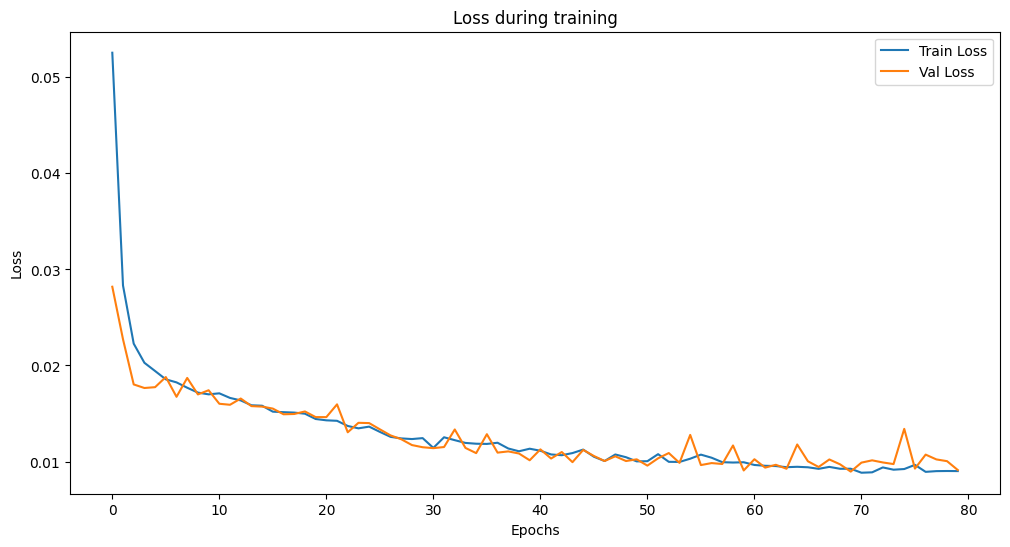

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0119 - mae: 0.0725 - mse: 0.0119 
Validation Loss : 0.00894893053919077
Validation MAE: 0.06068822368979454
Validation MSE: 0.00894893053919077
Validation RMSE: 0.09459878719725094
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Test MAE: 244.55616084918265
Test MSE: 132910.11664201753
Test RMSE: 364.56839775550696
Test R²: 0.7530831013846614
Test CVRMSE: 0.5847979460543229


In [257]:
model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    scaler_X, 
    scaler_Y
)
  

In [140]:
Text_final_reordered.head(1)

,0_j-2,1_j-2,2_j-2,3_j-2,4_j-2,5_j-2,6_j-2,7_j-2,8_j-2,9_j-2,10_j-2,11_j-2,12_j-2,13_j-2,14_j-2,15_j-2,16_j-2,17_j-2,18_j-2,19_j-2,20_j-2,21_j-2,22_j-2,23_j-2,heat_on_j-2,clusters_j-2,0_j-2_2,1_j-2_2,2_j-2_2,3_j-2_2,4_j-2_2,5_j-2_2,6_j-2_2,7_j-2_2,8_j-2_2,9_j-2_2,10_j-2_2,11_j-2_2,12_j-2_2,13_j-2_2,14_j-2_2,15_j-2_2,16_j-2_2,17_j-2_2,18_j-2_2,19_j-2_2,20_j-2_2,21_j-2_2,22_j-2_2,23_j-2_2,0_j-1,1_j-1,2_j-1,3_j-1,4_j-1,5_j-1,6_j-1,7_j-1,8_j-1,9_j-1,10_j-1,11_j-1,12_j-1,13_j-1,14_j-1,15_j-1,16_j-1,17_j-1,18_j-1,19_j-1,20_j-1,21_j-1,22_j-1,23_j-1,heat_on_j-1,clusters_j-1,0_j-1_2,1_j-1_2,2_j-1_2,3_j-1_2,4_j-1_2,5_j-1_2,6_j-1_2,7_j-1_2,8_j-1_2,9_j-1_2,10_j-1_2,11_j-1_2,12_j-1_2,13_j-1_2,14_j-1_2,15_j-1_2,16_j-1_2,17_j-1_2,18_j-1_2,19_j-1_2,20_j-1_2,21_j-1_2,22_j-1_2,23_j-1_2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,heat_on,clusters_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,9.06,8.93,8.5,8.14,7.985,7.81,7.8,7.81,7.95,8.76,10.415,12.35,13.595,14.29,14.29,12.995,11.43,10.35,9.955,10.115,10.08,9.875,9.74,9.695,1,2,0.0,1191.035222,1312.758731,1419.587492,1513.17473,1578.453365,1964.393414,2340.466249,2674.424141,1974.679566,764.431616,0.0,0.0,0.0,0.0,0.0,46.882802,0.0,12.597284,165.032178,309.615664,454.360768,581.485442,692.696269,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,1,2,810.107258,932.496397,1038.400298,1125.989678,1203.801168,1262.344356,1615.840151,1906.159536,2163.834353,2141.193211,2045.397519,1392.473496,1642.885784,1425.817471,1235.423295,1216.862847,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856,13.715,13.685,13.87,14.49,15.24,15.57,15.76,15.765,15.485,15.33,15.45,15.78,16.045,16.045,15.995,15.965,15.585,14.83,14.145,13.705,13.27,12.95,12.925,13.19,1,0.0,1003.897458,1022.89932,1018.746767,970.512303,901.581261,847.178108,864.854141,891.012656,970.925253,970.136841,727.212779,200.974158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.356592,200.292594,324.326513,405.764384,454.396293


In [141]:
constantes = Text_final_reordered[['heat_on_j-2','clusters_j-2','heat_on_j-1','clusters_j-1','heat_on', 'clusters_1']].values  # shape (N, 4)


In [142]:
const_expanded = np.repeat(constantes[:, np.newaxis, :], X.shape[1], axis=1)


In [145]:
X = np.concatenate([X, const_expanded], axis=2)

In [101]:
plot_true_vs_predicted_interactive(indices=[15, 11, 13,32,89], y_test=y_test, predictions=predictions2, scaler_cons=scaler_Y)


In [302]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dropout, Dense

def model_cnn_lstm(X_train2, y_train2, X_test2, y_test2, scaler_temp, scaler_cons):
    model2 = Sequential()
    # Couche convolutionnelle 1D (filtre=32, kernel=3, activation relu)
    model2.add(Conv1D(filters=120, kernel_size=5, activation='relu',padding='valid', input_shape=(X_train2.shape[1], X_train2.shape[2])))

    model2.add(MaxPooling1D(pool_size=2))
    
    # Couche LSTM avec 68 unités, activation tanh
    model2.add(LSTM(120, activation='tanh'))
    
    # Dropout pour régularisation
    model2.add(Dropout(0.5))
    
    # Couche Dense finale (24 sorties, activation linéaire)
    model2.add(Dense(24, activation='linear'))
    
    # Entraînement et évaluation
    history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = train_and_evaluate(
        model2, X_train2, y_train2, X_test2, y_test2, scaler_temp, scaler_cons
    )
    
    return model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2


In [303]:
X_train2.shape

(1012, 1, 76)

c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0592 - mae: 0.1711 - mse: 0.0592 - val_loss: 0.0235 - val_mae: 0.1086 - val_mse: 0.0235
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0289 - mae: 0.1184 - mse: 0.0289 - val_loss: 0.0195 - val_mae: 0.0924 - val_mse: 0.0195
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0218 - mae: 0.1020 - mse: 0.0218 - val_loss: 0.0227 - val_mae: 0.0989 - val_mse: 0.0227
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0204 - mae: 0.0992 - mse: 0.0204 - val_loss: 0.0190 - val_mae: 0.0979 - val_mse: 0.0190
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0202 - mae: 0.0975 - mse: 0.0202 - val_loss: 0.0173 - val_mae: 0.0864 - val_mse: 0.0173
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0189 - mae: 0.0939 - mse: 0.0189 - val_loss: 0.0171 - val_mae: 0.0843 - val_mse: 0.0171
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0178 - mae: 0.0922 - mse: 0.0178 - val

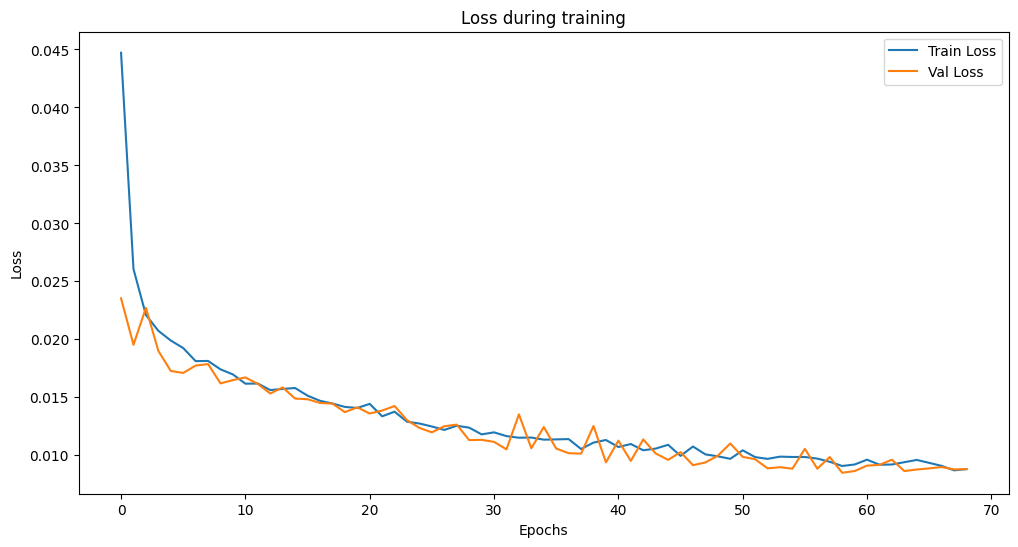

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0112 - mae: 0.0680 - mse: 0.0112
Validation Loss : 0.008496505208313465
Validation MAE: 0.057311996817588806
Validation MSE: 0.008496505208313465
Validation RMSE: 0.09217648945535659
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
Test MAE: 251.65774017757556
Test MSE: 135259.92063924565
Test RMSE: 367.77699851845773
Test R²: 0.7364293623506851
Test CVRMSE: 0.5899448077884558


In [304]:
model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_cnn_lstm(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    scaler_X, 
    scaler_y
)
  